In [2]:
import pandas as pd
from sklearn.preprocessing import MaxAbsScaler, LabelEncoder
label_encoder = LabelEncoder()
import json

In [3]:
data = json.load(open('nsl.json'))

In [4]:
dataList = list(data.keys())

In [5]:
baredf = pd.read_csv("../../../data/clean_nslkdd.csv", names=dataList, header=None, index_col=False)

In [9]:
from scipy.stats import skew, kurtosis, mode
import matplotlib.pyplot as plt 

In [66]:
def plot_categorical_distribution_ax(series, ax):
    counts = series.value_counts()
    mode_val = counts.idxmax()
    mode_freq = counts.max()
    num_unique = counts.size

    counts.plot(kind='bar', ax=ax)
    ax.set_title(f'Distribuição Categórica: {series.name}')
    ax.set_ylabel('Frequência')
    ax.set_xlabel('Categoria')

    textstr = f'Categorias: {num_unique}\nModa: {mode_val} ({mode_freq})'
    ax.text(0.95, 0.95, textstr, transform=ax.transAxes, fontsize=9,
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

def plot_numerical_stats_ax(series, ax):
    mean_val = series.mean()
    median_val = series.median()
    mode_vals = series.mode()
    mode_val = mode_vals.iloc[0] if not mode_vals.empty else None
    std_val = series.std()
    skew_val = skew(series.dropna())
    kurt_val = kurtosis(series.dropna())

    # Boxplot no eixo
    ax.boxplot(series.dropna(), vert=False)
    ax.set_title(f'Boxplot: {series.name}')
    ax.set_xlabel('Valor')

    # Texto com as métricas
    textstr = (f'Média: {mean_val:.2f}\nModa: {mode_val}\nMediana: {median_val:.2f}\n'
               f'Desvio Padrão: {std_val:.2f}\nSkewness: {skew_val:.2f}\nKurtosis: {kurt_val:.2f}')
    
    ax.text(0.95, 0.95, textstr, transform=ax.transAxes, fontsize=9,
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))


def analyze_and_plot(baredf, data):
    # Separar colunas por tipo
    numeric_cols = sorted([col for col, tipo in data.items() if tipo == 'real' and col in baredf.columns])
    categorical_cols = sorted([col for col, tipo in data.items() if tipo != 'real' and col in baredf.columns])
    
    print(f"Colunas Numéricas ({len(numeric_cols)}): {numeric_cols}")
    print(f"Colunas Categóricas ({len(categorical_cols)}): {categorical_cols}")
    
    # Número total de gráficos = soma dos dois grupos
    total_plots = len(numeric_cols) + len(categorical_cols)
    ncols = 2
    nrows = (total_plots + ncols - 1) // ncols
    
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 5*nrows))
    axs = axs.flatten()
    
    i = 0
    # Plotar numéricos
    for col in numeric_cols:
        plot_numerical_stats_ax(baredf[col], axs[i])
        i += 1
    # Plotar categóricos
    for col in categorical_cols:
        plot_categorical_distribution_ax(baredf[col], axs[i])
        i += 1
    
    # Remover subplots extras
    for j in range(i, len(axs)):
        fig.delaxes(axs[j])
    
    fig.tight_layout()
    return fig


Colunas Numéricas (35): ['count', 'diff_srv_rate', 'dst_bytes', 'dst_host_count', 'dst_host_diff_srv_rate', 'dst_host_rerror_rate', 'dst_host_same_src_port_rate', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_count', 'dst_host_srv_diff_host_rate', 'dst_host_srv_rerror_rate', 'dst_host_srv_serror_rate', 'duration', 'extra', 'hot', 'num_access_files', 'num_compromised', 'num_failed_logins', 'num_file_creations', 'num_outbound_cmds', 'num_root', 'num_shells', 'rerror_rate', 'root_shell', 'same_srv_rate', 'serror_rate', 'src_bytes', 'srv_count', 'srv_diff_host_rate', 'srv_rerror_rate', 'srv_serror_rate', 'su_attempted', 'urgent', 'wrong_fragment']
Colunas Categóricas (8): ['class', 'flag', 'is_guest_login', 'is_host_login', 'land', 'logged_in', 'protocol_type', 'service']


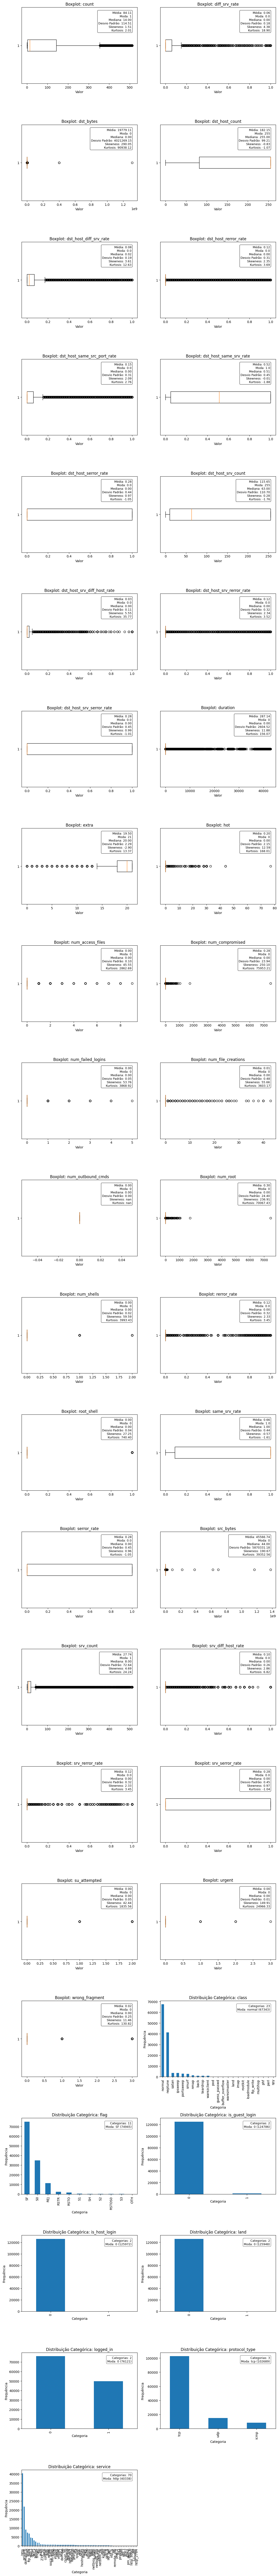

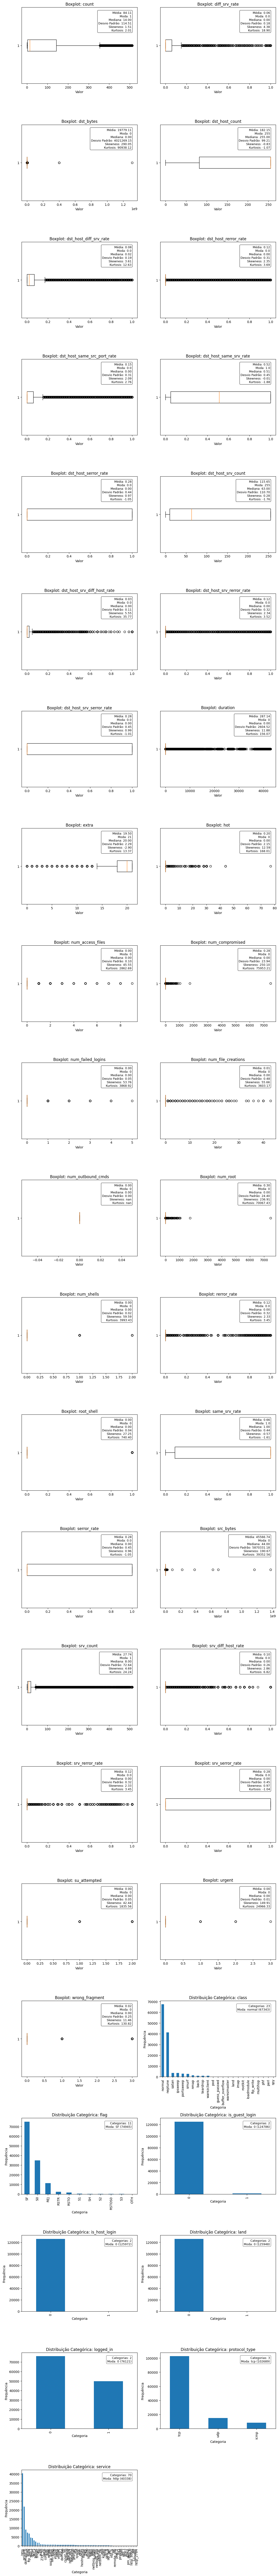

In [67]:
analyze_and_plot(baredf, data)

In [68]:
baredf = baredf.drop("extra", axis=1)

In [69]:
baredf['class'] = baredf.apply( lambda x: 0 if x['class'] == 'normal' else 1, axis=1)

In [70]:
baredf['protocol_type'] = label_encoder.fit_transform(baredf['protocol_type'])
baredf['flag'] = label_encoder.fit_transform(baredf['flag'])
baredf['service'] = label_encoder.fit_transform(baredf['service'])

In [71]:
baredf = pd.DataFrame(MaxAbsScaler().fit_transform(baredf))

In [72]:
ben = baredf[baredf[41] == 0]
att = baredf[baredf[41] != 0]

In [73]:
ben.shape

(67343, 42)

In [74]:
att.shape

(58630, 42)

In [75]:
ben = ben.iloc[:50000, :]
ben.shape

(50000, 42)

In [76]:
att = att.iloc[:50000, :]
att.shape

(50000, 42)

In [77]:
baredf.shape

(125973, 42)

In [78]:
baredf = pd.concat([att, ben])

In [79]:
baredf.shape

(100000, 42)

In [80]:
baredf.tail(5)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
93540,0.000000,0.5,0.289855,0.9,6.032767e-06,0.000000e+00,0.0,0.0,0.0,0.0,...,0.219608,0.22,0.02,0.22,0.00,0.00,0.00,0.0,0.0,0.0
93544,0.000023,0.5,0.782609,0.9,1.679754e-06,2.503936e-07,0.0,0.0,0.0,0.0,...,0.415686,0.60,0.02,0.01,0.00,0.00,0.00,0.0,0.0,0.0
93545,0.000000,0.5,0.347826,0.9,3.282695e-07,5.241472e-06,0.0,0.0,0.0,0.0,...,1.000000,1.00,0.00,0.00,0.00,0.01,0.01,0.0,0.0,0.0
93550,0.000000,1.0,0.173913,0.9,3.333421e-08,3.511618e-08,0.0,0.0,0.0,0.0,...,0.976471,0.98,0.01,0.00,0.00,0.00,0.00,0.0,0.0,0.0
93557,0.000000,0.5,0.347826,0.9,1.442067e-07,6.015555e-07,0.0,0.0,0.0,0.0,...,1.000000,1.00,0.00,0.00,0.01,0.00,0.00,0.0,0.0,0.0


In [81]:
baredf.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
80276,0.022164,0.5,0.637681,0.4,7.246566e-10,0.000000e+00,0.0,0.0,0.0,0.0,...,0.007843,0.01,0.73,1.00,0.00,0.00,0.0,1.0,1.0,1.0
99098,0.000000,0.5,0.260870,0.5,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.035294,0.04,0.05,0.00,0.00,1.00,1.0,0.0,0.0,1.0
31756,0.000000,0.5,0.782609,0.9,4.195762e-07,2.572642e-07,0.0,0.0,0.0,0.0,...,0.737255,0.70,0.03,0.00,0.01,0.00,0.0,0.0,0.0,0.0
43256,0.000000,0.5,0.826087,0.5,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.074510,0.07,0.07,0.00,0.00,1.00,1.0,0.0,0.0,1.0
12065,0.000000,0.0,0.217391,0.9,4.637803e-08,0.000000e+00,0.0,0.0,0.0,0.0,...,0.007843,0.02,0.04,0.02,0.00,0.01,0.0,0.0,0.0,0.0


In [82]:
x = baredf.drop(columns=[41])
y=baredf[41]

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import auc, roc_curve, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE